# Machine Learning Pipeline

## Table of Contents
0. [explain data](#0-explain-data)
1. [Load data](#1-load-data)
2. [Exploratory Data Analysis (EDA)](#2-exploratory-data-analysis-eda)
3. [Data Cleaning](#3-data-cleaning)
4. [Feature Engineering](#4-feature-engineering)
5. [Encoding categorical features](#5-encoding-categorical-features)
6. [Feature Scaling](#6-feature-scaling)
7. [Split into Train/Test](#7-split-into-traintest)
8. [Model training](#8-model-training)
9. [Model evaluation](#9-model-evaluation)




## 0) Explain data

## **Used Cars Dataset Description**

### Overview
This dataset contains details of **762,091 used cars** scraped from **cars.com** in April 2023. It is ideal for Exploratory Data Analysis (EDA) and developing Machine Learning models to predict car prices.

## Feature Description

The features are categorized below to help understand the variables:

### 1. Car Specifications
Technical and mechanical identity of the vehicle:
* **`manufacturer`**: Name of the car manufacturer (e.g., Toyota, BMW, Ford).
* **`model`**: Name of the specific car model.
* **`year`**: The production year (a strong indicator of age).
* **`engine`**: Engine details (capacity, cylinders, etc.).
* **`transmission`**: Type of transmission (Automatic, Manual, CVT).
* **`drivetrain`**: Drivetrain type (FWD, RWD, AWD).
* **`fuel_type`**: Type of fuel consumed (Gasoline, Diesel, Electric, Hybrid).
* **`mpg`**: Fuel efficiency (Miles Per Gallon).

### 2. Condition & History
Factors directly affecting the car's quality and value:
* **`mileage`**: The number of miles traveled (higher mileage typically lowers value).
* **`accidents_or_damage`**: Whether the car was involved in accidents or has reported damage.
* **`one_owner`**: Whether the car has had only one previous owner (usually a positive indicator).
* **`personal_use_only`**: Whether the car was used strictly for personal purposes (vs. commercial/rental).
* **`exterior_color`**: Car exterior color.
* **`interior_color`**: Car interior color.

### 3. Seller & Market Data
Information regarding the seller and market reception:
* **`seller_name`**: Name of the seller or dealership.
* **`seller_rating`**: The seller's rating on the platform.
* **`driver_rating`**: General rating given by drivers for this car model.
* **`driver_reviews_num`**: The number of reviews left by drivers for this model.
* **`price_drop`**: The amount of price reduction from the initial listing price.

### 4. Target Variable
* **`price`**: The car price (This is the dependent variable typically used for Regression tasks).


## 1) Load data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import re
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,  root_mean_squared_error, classification_report

In [4]:
df = pd.read_csv('data/cars.csv')
df.head()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,NaN,0.0,1.0,1.0,Apple Tree Acura,NaN,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,NaN,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0


In [5]:
df.shape

(762091, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762091 entries, 0 to 762090
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manufacturer         762091 non-null  object 
 1   model                762091 non-null  object 
 2   year                 762091 non-null  int64  
 3   mileage              761585 non-null  float64
 4   engine               747041 non-null  object 
 5   transmission         752187 non-null  object 
 6   drivetrain           740529 non-null  object 
 7   fuel_type            739164 non-null  object 
 8   mpg                  620020 non-null  object 
 9   exterior_color       753232 non-null  object 
 10  interior_color       705116 non-null  object 
 11  accidents_or_damage  737879 non-null  float64
 12  one_owner            730608 non-null  float64
 13  personal_use_only    737239 non-null  float64
 14  seller_name          753498 non-null  object 
 15  seller_rating    

In [7]:
df.describe()

,year,mileage,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price
count,762091.000000,7.615850e+05,737879.000000,730608.000000,737239.000000,548118.000000,730459.000000,762091.000000,410112.000000,7.620910e+05
mean,2017.791398,5.578169e+04,0.228616,0.561969,0.657212,4.158568,4.623523,89.550900,1007.467068,3.648898e+04
std,5.110532,4.355788e+04,0.419942,0.496145,0.474642,0.805741,0.276902,115.082266,1375.122208,1.984183e+06
min,1915.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,100.000000,1.000000e+00
25%,2016.000000,2.328700e+04,0.000000,0.000000,0.000000,3.800000,4.500000,14.000000,380.000000,1.958300e+04
50%,2019.000000,4.559600e+04,0.000000,1.000000,1.000000,4.500000,4.700000,51.000000,642.000000,2.798900e+04
75%,2021.000000,7.836500e+04,0.000000,1.000000,1.000000,4.700000,4.800000,119.000000,1007.000000,3.948800e+04
max,2024.000000,1.119067e+06,1.000000,1.000000,1.000000,5.000000,5.000000,1025.000000,170995.000000,1.000000e+09


In [8]:
df

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,NaN,0.0,1.0,1.0,Apple Tree Acura,NaN,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,NaN,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762086,Volvo,S60 B5 Momentum,2022,22877.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,25-33,Bright Silver Metallic,Blond,0.0,1.0,0.0,Volvo Cars Danbury,4.2,4.2,2.0,250.0,34798.0
762087,Volvo,S60 T5,2012,72900.0,250.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,A/T,Front-wheel Drive,Gasoline,NaN,Red,Beige,NaN,NaN,NaN,NaN,NaN,4.5,101.0,NaN,12500.0
762088,Volvo,S60 T5,2014,92000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,Front-wheel Drive,Gasoline,21-30,Ice White,Soft Beige,0.0,0.0,1.0,Dapper Car Sales,NaN,4.8,36.0,300.0,12299.0
762089,Volvo,S60 T5 Platinum,2013,132000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,All-wheel Drive,Gasoline,20-29,Ice White,Off Black,1.0,0.0,0.0,Legend Auto Sales Inc.,4.6,4.7,62.0,1000.0,8995.0


## 2.1 Exploratory Data Analysis (EDA) Before Cleaning

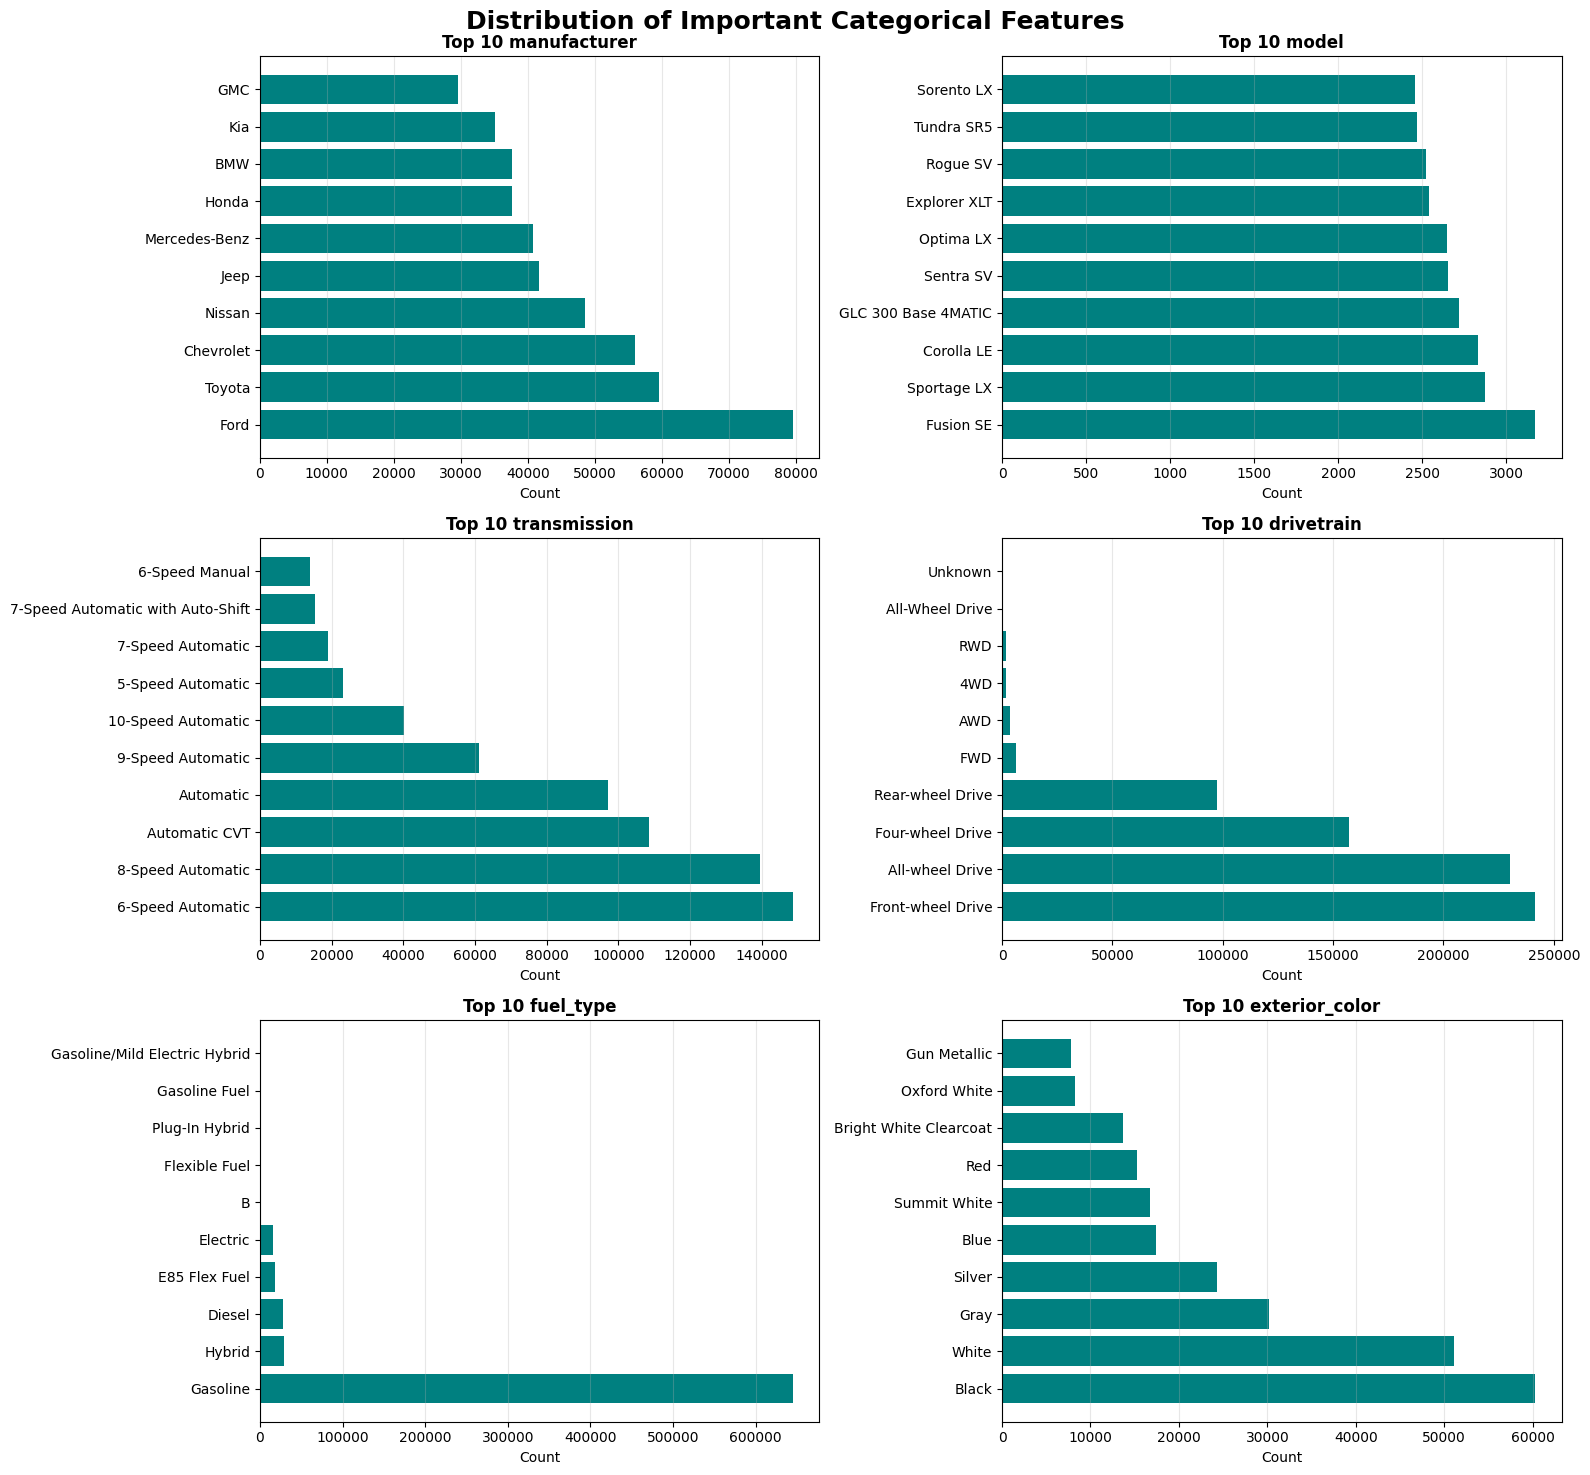

In [9]:
cols_numerical = df.select_dtypes(include=['number']).columns.tolist()
cols_categorical = df.select_dtypes(include=['object', 'category']).columns.tolist()

important_categorical = ['manufacturer', 'model', 'transmission', 'drivetrain',
                         'fuel_type', 'exterior_color']
important_categorical = [col for col in important_categorical if col in cols_categorical]

if important_categorical:
    n_cols = 2
    n_rows = (len(important_categorical) + 1) // 2

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))
    fig.suptitle('Distribution of Important Categorical Features', fontsize=18, fontweight='bold')
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 and n_cols == 1 else axes

    for idx, col in enumerate(important_categorical):
        top_10 = df[col].value_counts().head(10)
        axes[idx].barh(range(len(top_10)), top_10.values, color='teal')
        axes[idx].set_yticks(range(len(top_10)))
        axes[idx].set_yticklabels(top_10.index)
        axes[idx].set_title(f'Top 10 {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Count')
        axes[idx].grid(axis='x', alpha=0.3)

    for idx in range(len(important_categorical), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()


Correlation with Price:
price                  1.000000
price_drop             0.353573
one_owner              0.004003
seller_rating          0.002311
year                   0.002154
personal_use_only      0.001641
driver_rating          0.000251
driver_reviews_num    -0.002575
mileage               -0.003171
accidents_or_damage   -0.003209
Name: price, dtype: float64


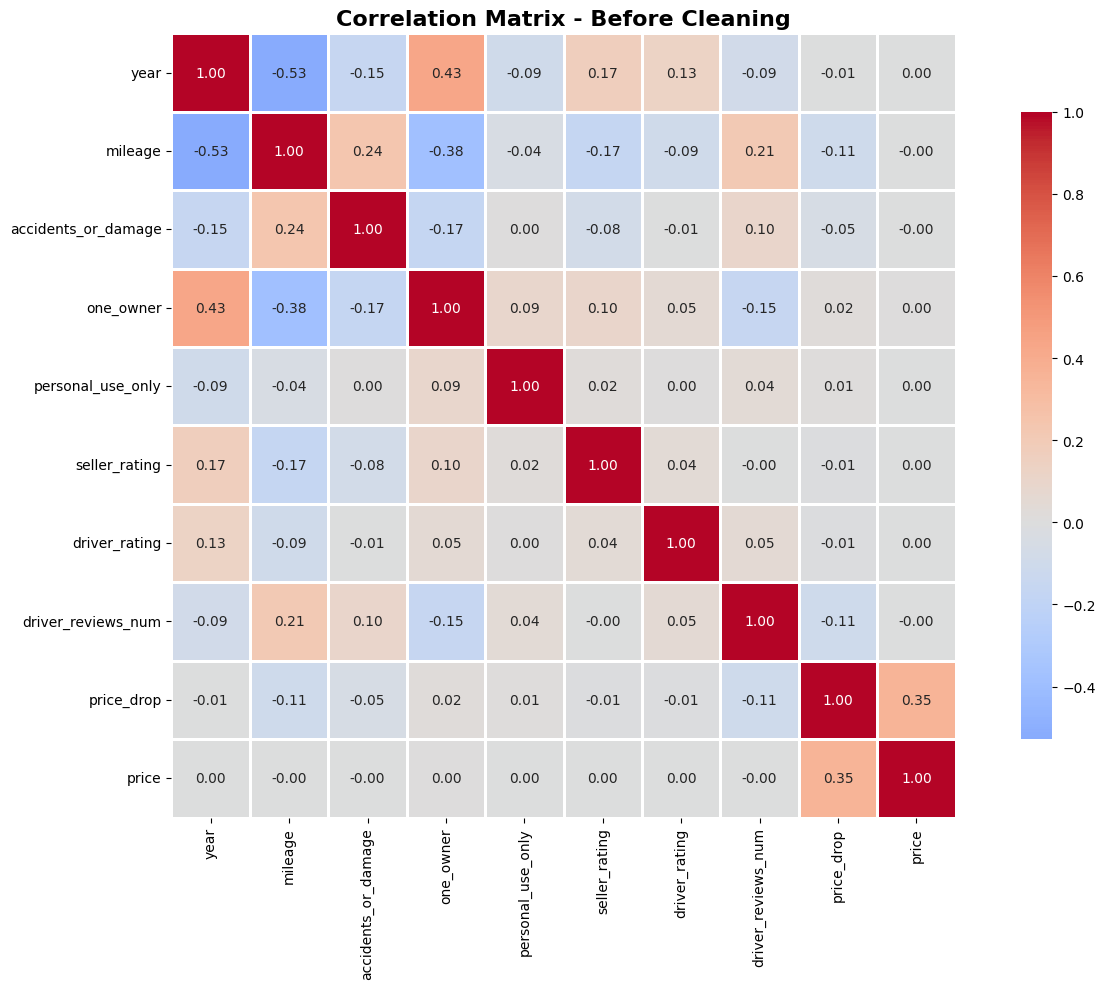

In [10]:
correlation_matrix = df[cols_numerical].corr()
print("\nCorrelation with Price:")
print(correlation_matrix['price'].sort_values(ascending=False))

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Before Cleaning', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

mileage                158751
price                   63464
seller_name             18254
model                   12187
exterior_color           7681
engine                   6903
price_drop               6404
interior_color           4679
transmission             1313
mpg                       865
driver_reviews_num        369
year                      100
seller_rating              41
fuel_type                  36
driver_rating              35
drivetrain                 33
manufacturer               30
accidents_or_damage         2
one_owner                   2
personal_use_only           2
dtype: int64


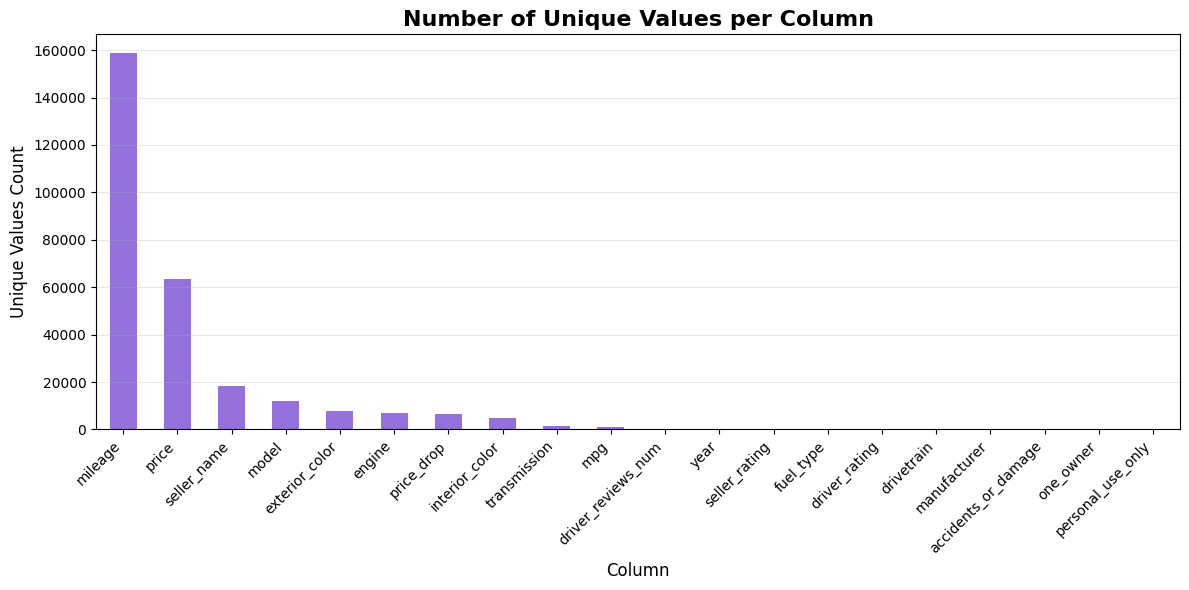

In [11]:
unique_counts = df.nunique().sort_values(ascending=False)
print(unique_counts)

plt.figure(figsize=(12, 6))
unique_counts.plot(kind='bar', color='mediumpurple')
plt.title('Number of Unique Values per Column', fontsize=16, fontweight='bold')
plt.xlabel('Column', fontsize=12)
plt.ylabel('Unique Values Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## 3) Data Cleaning

- ### Fix wrong data types


In [12]:
df['accidents_or_damage'] = df['accidents_or_damage'].astype('category')
df['one_owner'] = df['one_owner'].astype('category')
df['personal_use_only'] = df['personal_use_only'].astype('category')

In [13]:
cols_numerical = df.select_dtypes(include=['number']).columns.tolist()
cols_categorical = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [14]:
cols_numerical

['year',
 'mileage',
 'seller_rating',
 'driver_rating',
 'driver_reviews_num',
 'price_drop',
 'price']

In [15]:
cols_categorical

['manufacturer',
 'model',
 'engine',
 'transmission',
 'drivetrain',
 'fuel_type',
 'mpg',
 'exterior_color',
 'interior_color',
 'accidents_or_damage',
 'one_owner',
 'personal_use_only',
 'seller_name']

- ### Handle missing values (Remove and imputation)

In [16]:
df.isnull().sum()

manufacturer                0
model                       0
year                        0
mileage                   506
engine                  15050
transmission             9904
drivetrain              21562
fuel_type               22927
mpg                    142071
exterior_color           8859
interior_color          56975
accidents_or_damage     24212
one_owner               31483
personal_use_only       24852
seller_name              8593
seller_rating          213973
driver_rating           31632
driver_reviews_num          0
price_drop             351979
price                       0
dtype: int64

In [17]:
null_percent = df.isnull().mean() * 100

print(null_percent)


manufacturer            0.000000
model                   0.000000
year                    0.000000
mileage                 0.066396
engine                  1.974830
transmission            1.299582
drivetrain              2.829321
fuel_type               3.008433
mpg                    18.642262
exterior_color          1.162460
interior_color          7.476141
accidents_or_damage     3.177048
one_owner               4.131134
personal_use_only       3.261028
seller_name             1.127556
seller_rating          28.077093
driver_rating           4.150685
driver_reviews_num      0.000000
price_drop             46.185954
price                   0.000000
dtype: float64


In [18]:
df.columns

Index(['manufacturer', 'model', 'year', 'mileage', 'engine', 'transmission',
       'drivetrain', 'fuel_type', 'mpg', 'exterior_color', 'interior_color',
       'accidents_or_damage', 'one_owner', 'personal_use_only', 'seller_name',
       'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop',
       'price'],
      dtype='object')

In [19]:
result = SimpleImputer(strategy = 'median')
df[cols_numerical] = result.fit_transform(df[cols_numerical])

In [20]:
result = SimpleImputer(strategy = 'most_frequent')
df[cols_categorical] = result.fit_transform(df[cols_categorical])

In [21]:
df.drop(['price_drop', 'seller_rating'], axis=1, inplace=True)

- ### Remove Duplicates

In [22]:
df.duplicated().sum()

np.int64(9328)

In [23]:
df.drop_duplicates(inplace=True)

- ### Remove Outliers

In [24]:
cols_numerical

['year',
 'mileage',
 'seller_rating',
 'driver_rating',
 'driver_reviews_num',
 'price_drop',
 'price']

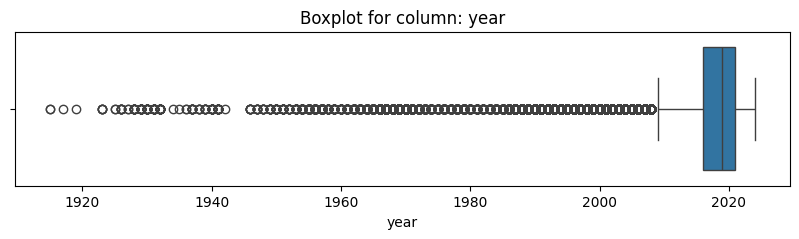

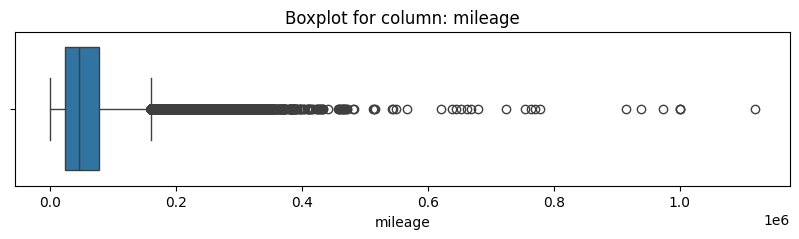

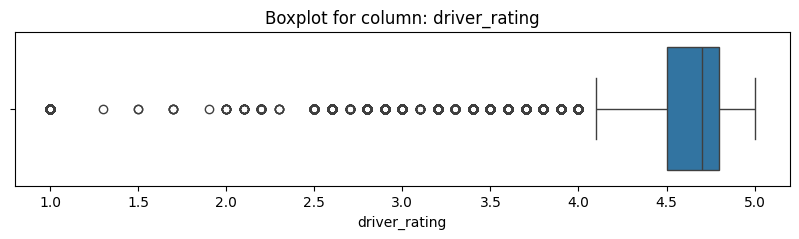

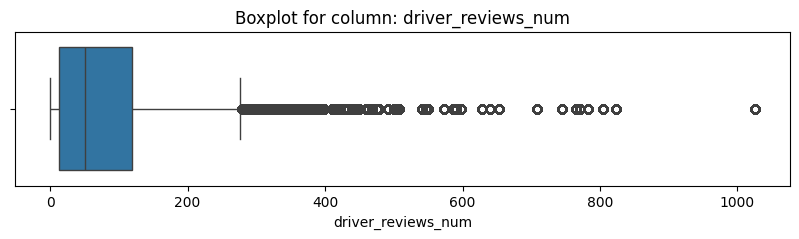

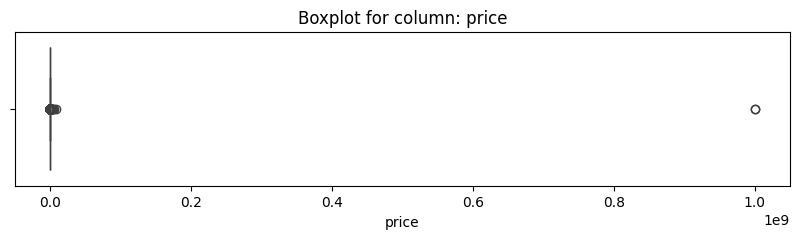

In [25]:
cols_numerical = df.select_dtypes(include=['number']).columns.tolist()
for col in cols_numerical:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x =df[col])
    plt.title(f'Boxplot for column: {col}')
    plt.show()

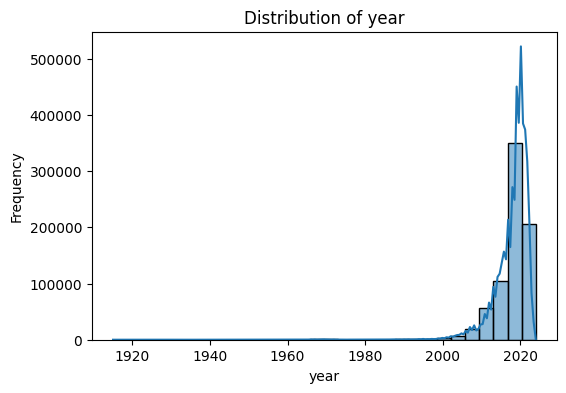

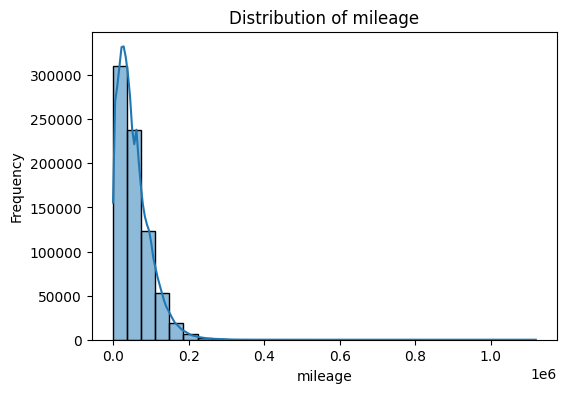

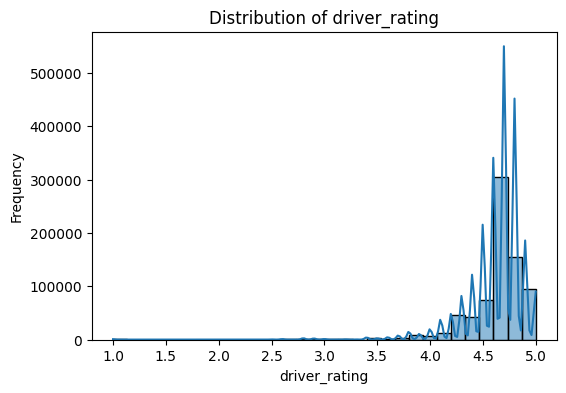

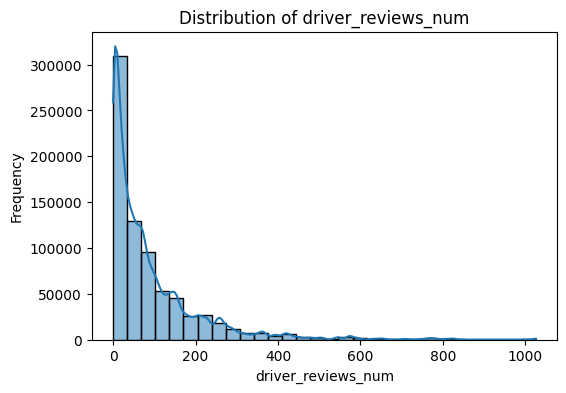

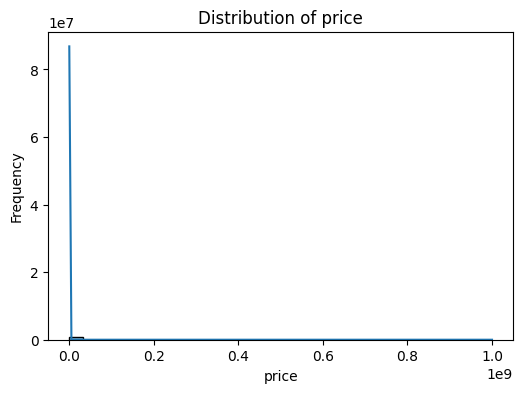

In [26]:
for col in cols_numerical:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [27]:
for col in cols_numerical:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower) & (df[col] <= upper)]


<Axes: >

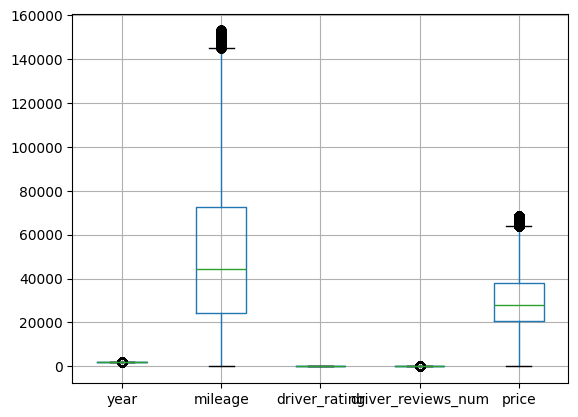

In [28]:
df.boxplot()

## 2.2 Exploratory Data Analysis (EDA) After Cleaning

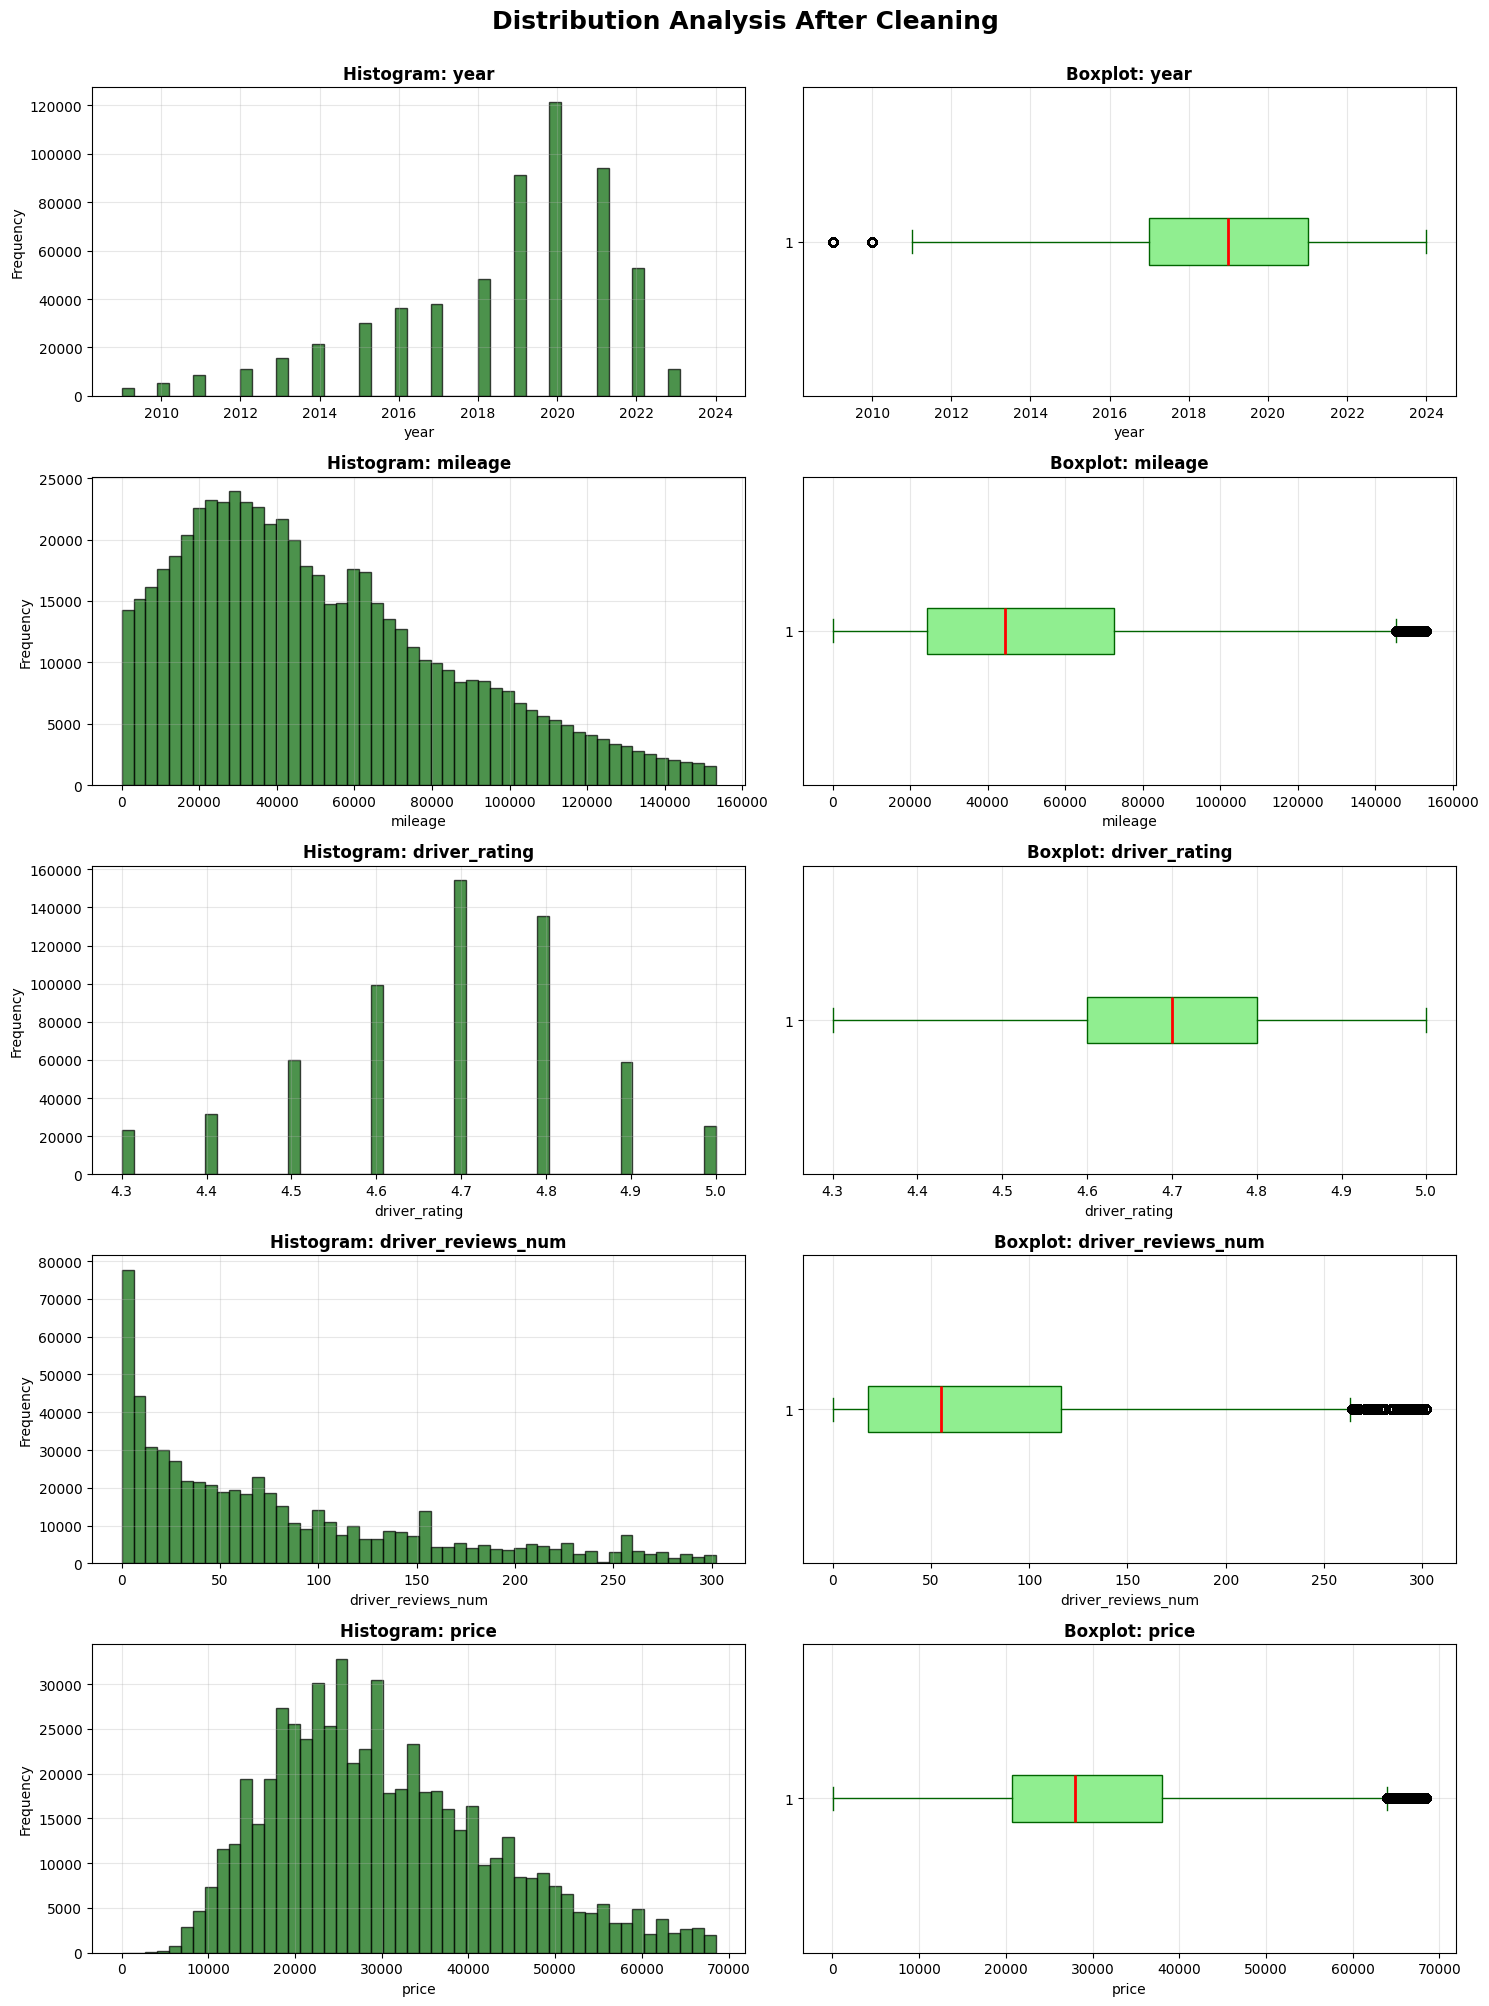

In [29]:
fig, axes = plt.subplots(len(cols_numerical), 2, figsize=(15, 4*len(cols_numerical)))
fig.suptitle('Distribution Analysis After Cleaning', fontsize=18, fontweight='bold', y=1.001)

for idx, col in enumerate(cols_numerical):
    # Histogram
    axes[idx, 0].hist(df[col], bins=50, edgecolor='black', alpha=0.7, color='darkgreen')
    axes[idx, 0].set_title(f'Histogram: {col}', fontsize=12, fontweight='bold')
    axes[idx, 0].set_xlabel(col)
    axes[idx, 0].set_ylabel('Frequency')
    axes[idx, 0].grid(alpha=0.3)

    # Boxplot
    axes[idx, 1].boxplot(df[col], vert=False, patch_artist=True,
                         boxprops=dict(facecolor='lightgreen', color='darkgreen'),
                         whiskerprops=dict(color='darkgreen'),
                         capprops=dict(color='darkgreen'),
                         medianprops=dict(color='red', linewidth=2))
    axes[idx, 1].set_title(f'Boxplot: {col}', fontsize=12, fontweight='bold')
    axes[idx, 1].set_xlabel(col)
    axes[idx, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


Correlation with Price (sorted):
price                 1.000000
year                  0.557830
driver_rating         0.185675
driver_reviews_num   -0.391408
mileage              -0.536739
Name: price, dtype: float64


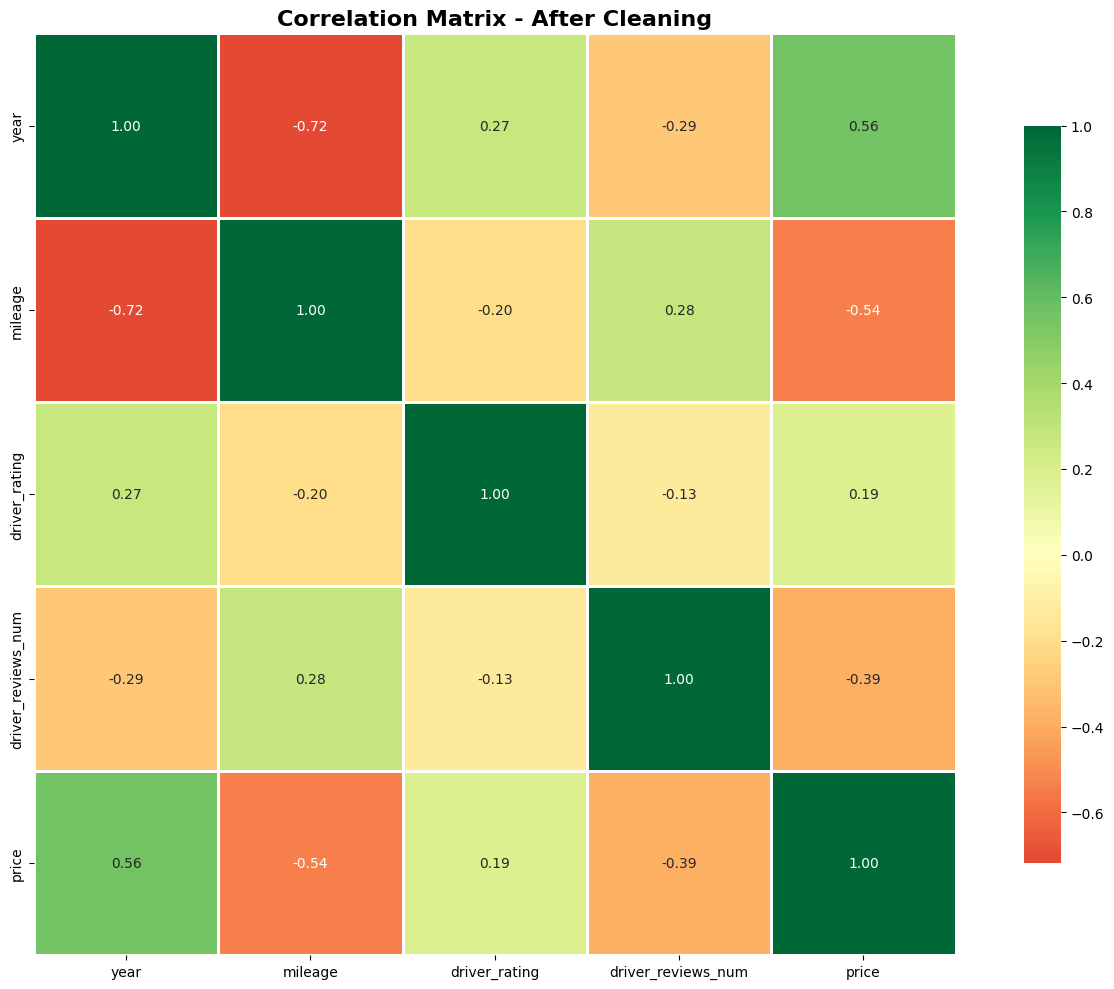

In [30]:
correlation_matrix_after = df[cols_numerical].corr()

# Correlation with target variable (price)
print("\nCorrelation with Price (sorted):")
price_corr = correlation_matrix_after['price'].sort_values(ascending=False)
print(price_corr)

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_after, annot=True, fmt='.2f', cmap='RdYlGn',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - After Cleaning', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 4) Feature Engineering

In [31]:
df["car_age"] = 2025 - df["year"] # new feature: car age

In [32]:
def extract_engine_size(text):
    if pd.isna(text):
        return np.nan
    match = re.search(r"(\d\.\d|\d)L", text)
    return float(match.group(1)) if match else np.nan

df["engine_size"] = df["engine"].apply(extract_engine_size) # new feature: engine size in liters

In [33]:
def has_turbo(text):
    if pd.isna(text):
        return 0
    return int("turbo" in text.lower())

df["is_turbo"] = df["engine"].apply(has_turbo) # new feature: is turbo

In [34]:
df["price_per_mile"] = df["price"] / (df["mileage"] + 1) # new feature: price per mile

In [35]:
df["is_automatic"] = df["transmission"].str.contains("Auto", case=False, na=False).astype(int) # new feature: is automatic transmission

In [36]:
df["is_AWD"] = df["drivetrain"].str.contains("AWD", case=False, na=False).astype(int)
df["is_FWD"] = df["drivetrain"].str.contains("FWD", case=False, na=False).astype(int)
df["is_RWD"] = df["drivetrain"].str.contains("RWD", case=False, na=False).astype(int) # new features: is AWD, FWD, RWD

In [37]:
df["total_usage_score"] = df[["one_owner", "personal_use_only"]].sum(axis=1) # new feature: total usage score

In [38]:
df["mileage_per_year"] = df["mileage"] / df["car_age"].replace(0, 1) # new feature: mileage per year

In [39]:
result = SimpleImputer(strategy = 'median')
df['engine_size'] = result.fit_transform(df[['engine_size']])

## 5) Encoding categorical features

In [40]:
LE = LabelEncoder()

for i in cols_categorical:
  df[i] = LE.fit_transform(df[i])

In [41]:
df

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,car_age,engine_size,is_turbo,price_per_mile,is_automatic,is_AWD,is_FWD,is_RWD,total_usage_score,mileage_per_year
0,0,3433,2013.0,92945.0,77,513,24,14,624,539,...,12.0,1.5,0,0.150496,1,0,0,0,0.0,7745.416667
1,0,3433,2013.0,47645.0,93,521,24,17,624,2181,...,12.0,1.5,0,0.377681,1,0,0,0,2.0,3970.416667
2,0,3433,2013.0,53422.0,93,521,24,17,624,499,...,12.0,1.5,0,0.318215,1,0,0,0,2.0,4451.833333
3,0,3433,2013.0,117598.0,93,521,24,17,624,3646,...,12.0,1.5,0,0.127195,1,0,0,0,2.0,9799.833333
4,0,3433,2013.0,114865.0,93,521,24,17,624,539,...,12.0,1.5,0,0.126217,1,0,0,0,1.0,9572.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762085,29,5950,2020.0,26781.0,488,315,24,14,368,1397,...,5.0,2.0,1,1.153125,1,0,0,0,2.0,5356.200000
762087,29,5950,2012.0,72900.0,1006,367,24,14,252,3816,...,13.0,2.5,0,0.171465,0,0,0,0,2.0,5607.692308
762088,29,5950,2014.0,92000.0,855,158,24,14,311,2393,...,11.0,2.5,1,0.133683,1,0,0,0,1.0,8363.636364
762089,29,5963,2013.0,132000.0,855,158,8,14,285,2393,...,12.0,2.5,1,0.068143,1,0,0,0,0.0,11000.000000


## 6) Feature Scaling

In [42]:
scaler = StandardScaler()
df[cols_numerical] = scaler.fit_transform(df[cols_numerical])

<Axes: >

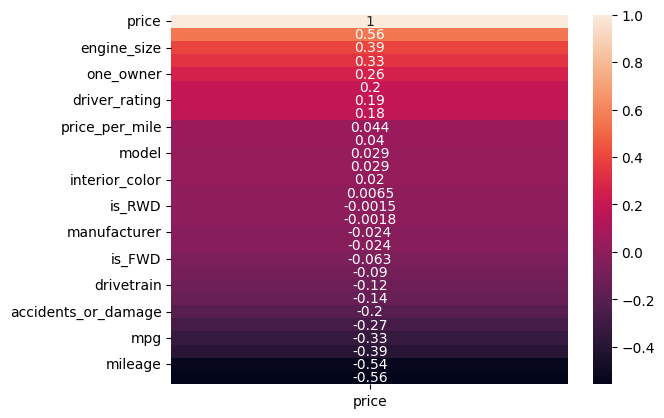

In [43]:
import seaborn as sns
corr = df.corr()
labelded_data = corr[['price']].sort_values('price' , ascending = False)
sns.heatmap(labelded_data,annot = True)

In [44]:
df.drop(['personal_use_only',
    'interior_color',
    'exterior_color',
    'manufacturer',
    'model',
    'seller_name',], axis=1, inplace=True)

In [45]:
df.columns


Index(['year', 'mileage', 'engine', 'transmission', 'drivetrain', 'fuel_type',
       'mpg', 'accidents_or_damage', 'one_owner', 'driver_rating',
       'driver_reviews_num', 'price', 'car_age', 'engine_size', 'is_turbo',
       'price_per_mile', 'is_automatic', 'is_AWD', 'is_FWD', 'is_RWD',
       'total_usage_score', 'mileage_per_year'],
      dtype='object')

In [46]:
df['engine_size']

0         1.5
1         1.5
2         1.5
3         1.5
4         1.5
         ... 
762085    2.0
762087    2.5
762088    2.5
762089    2.5
762090    2.5
Name: engine_size, Length: 587923, dtype: float64

## 7) Split into Train/Test

In [47]:
y = df['price']
x = df.drop('price',axis = 1)

In [48]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state=42,shuffle=True)

## 8) Model training


***ElasticNet*** is very sensitive to the size of the numbers, so we need to do a StandardScaler.

In [49]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)




> **ElasticNet**






In [50]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic.fit(x_train_scaled, y_train)
y_pred_elastic = elastic.predict(x_test_scaled)




> **Linear Regression**






In [51]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(x_train_scaled, y_train)
y_pred_lin = lin.predict(x_test_scaled)



> **Decision Tree Regressor**





In [52]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=5,
    random_state=42
)

tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)


## 9) Model evaluation

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate(name, y_test, y_pred):
    RMSE = mean_squared_error(y_test, y_pred)
    MAE  = mean_absolute_error(y_test, y_pred)
    R2   = r2_score(y_test, y_pred)

    print(f"\nModel: {name}")
    print(f"RMSE: {RMSE:.3f}")
    print(f"MAE : {MAE:.3f}")
    print(f"R²  : {R2:.3f}")

evaluate("ElasticNet", y_test, y_pred_elastic)
evaluate("Linear Regression", y_test, y_pred_lin)
evaluate("Decision Tree", y_test, y_pred_tree)




Model: ElasticNet
RMSE: 0.334
MAE : 0.438
R²  : 0.666

Model: Linear Regression
RMSE: 0.310
MAE : 0.423
R²  : 0.690

Model: Decision Tree
RMSE: 0.018
MAE : 0.050
R²  : 0.982


In [ ]:
import joblib
joblib.dump(tree, 'models/decision_tree_model.pkl')

['models/decision_tree_model.pkl']